# ML - assignment_1

## Exploratory Data Analysis

In [3]:
# importing libraries
from sklearn.model_selection import train_test_split ,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import scipy.stats as stats

import pandas as pd
import numpy as np
import shap

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")


In [4]:
# reading the data into a DataFrame
df = pd.read_csv(r'C:\dev\Machine-learning-course\assignment-1\car_prices_dataset.csv')

In [5]:
# inspecitng the head of the dataframe
df.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,dashboard color
0,Mazda,2,2005,Manual,Hybrid,Black,1968.551345,246331.286848,2.974746,159.040191,4.125051,4000.000000,4800.000000,Black
1,Skoda,Kodiaq,2023,Automatic,Hybrid,Red,1792.705225,146456.807651,4.021719,117.877067,5.335565,7000.245383,8400.294460,Red
2,Kia,Picanto,2017,Manual,Diesel,Red,NaN,253564.851985,0.917662,80.778050,5.637251,4000.000000,4800.000000,Red
3,Skoda,Octavia,2017,Manual,NaN,Red,1375.134678,165005.455171,1.063860,201.808899,8.092011,5550.672284,6660.806741,Red
4,Skoda,Octavia,2008,Manual,NaN,Silver,NaN,75019.284734,1.987323,143.429747,3.009993,4000.000000,4800.000000,Silver


In [6]:
# inspecting info of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            386 non-null    object 
 1   model            377 non-null    object 
 2   year             400 non-null    int64  
 3   transmission     381 non-null    object 
 4   fuel_type        380 non-null    object 
 5   color            378 non-null    object 
 6   engine_cc        368 non-null    float64
 7   mileage_km       357 non-null    float64
 8   owners           375 non-null    float64
 9   horsepower       362 non-null    float64
 10  condition_score  364 non-null    float64
 11  price            364 non-null    float64
 12  engine           364 non-null    float64
 13  dashboard color  400 non-null    object 
dtypes: float64(7), int64(1), object(6)
memory usage: 43.9+ KB


In [7]:
# zooming in on missing values
df.isnull().sum()

brand              14
model              23
year                0
transmission       19
fuel_type          20
color              22
engine_cc          32
mileage_km         43
owners             25
horsepower         38
condition_score    36
price              36
engine             36
dashboard color     0
dtype: int64

In [8]:
# inspecting the df statistics
df.describe()

,year,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine
count,400.000000,368.000000,3.570000e+02,375.000000,362.000000,364.000000,364.000000,364.000000
mean,2013.832500,1805.719054,1.564314e+05,2.469750,147.386296,6.263430,6878.217483,8253.860979
std,5.640832,840.878158,1.454959e+05,1.101516,55.716833,1.869973,11976.566179,14371.879415
min,2005.000000,1132.138002,7.281480e+03,0.891258,-200.000000,2.834251,50.000000,60.000000
25%,2009.000000,1406.821779,7.951115e+04,1.522554,113.148913,4.627634,4000.000000,4800.000000
50%,2014.000000,1776.244985,1.518242e+05,2.102685,153.316979,6.348563,4000.000000,4800.000000
75%,2019.000000,2004.184849,2.128380e+05,3.077524,187.908111,7.920143,6479.709122,7775.650947
max,2023.000000,10000.000000,1.330633e+06,4.143404,228.466290,9.572043,105225.753553,126270.904264


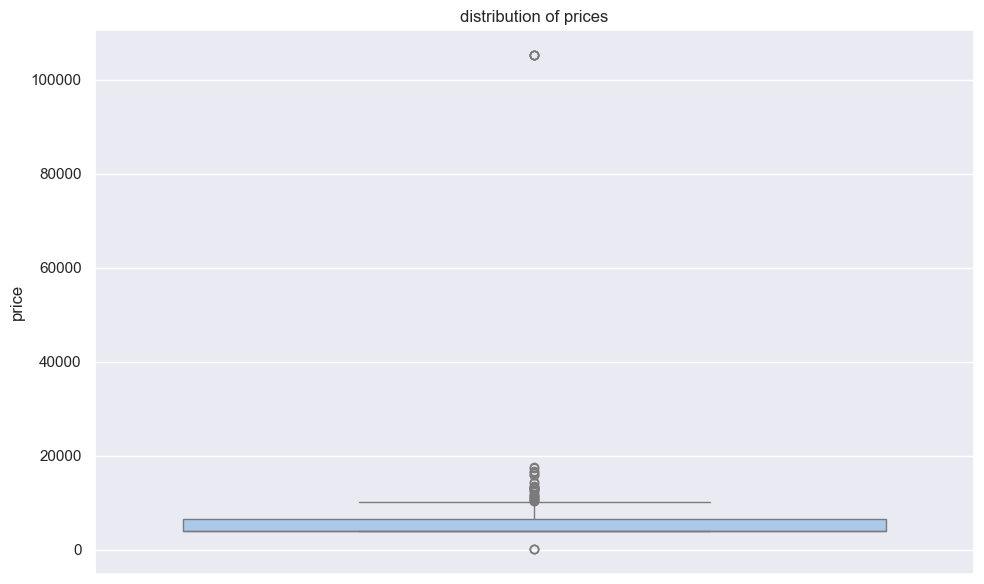

In [9]:
# inspecting the distribution of price
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y="price")
plt.title("distribution of prices")
plt.tight_layout()
plt.show()

In [10]:
# printing the counts for each price value
df["price"].value_counts().sort_values(ascending=False)

price
4000.000000      233
105225.753553      5
50.000000          3
5550.672284        1
4196.316709        1
                ... 
7697.881332        1
8923.695997        1
13456.015346       1
17349.344311       1
5053.179254        1
Name: count, Length: 126, dtype: int64

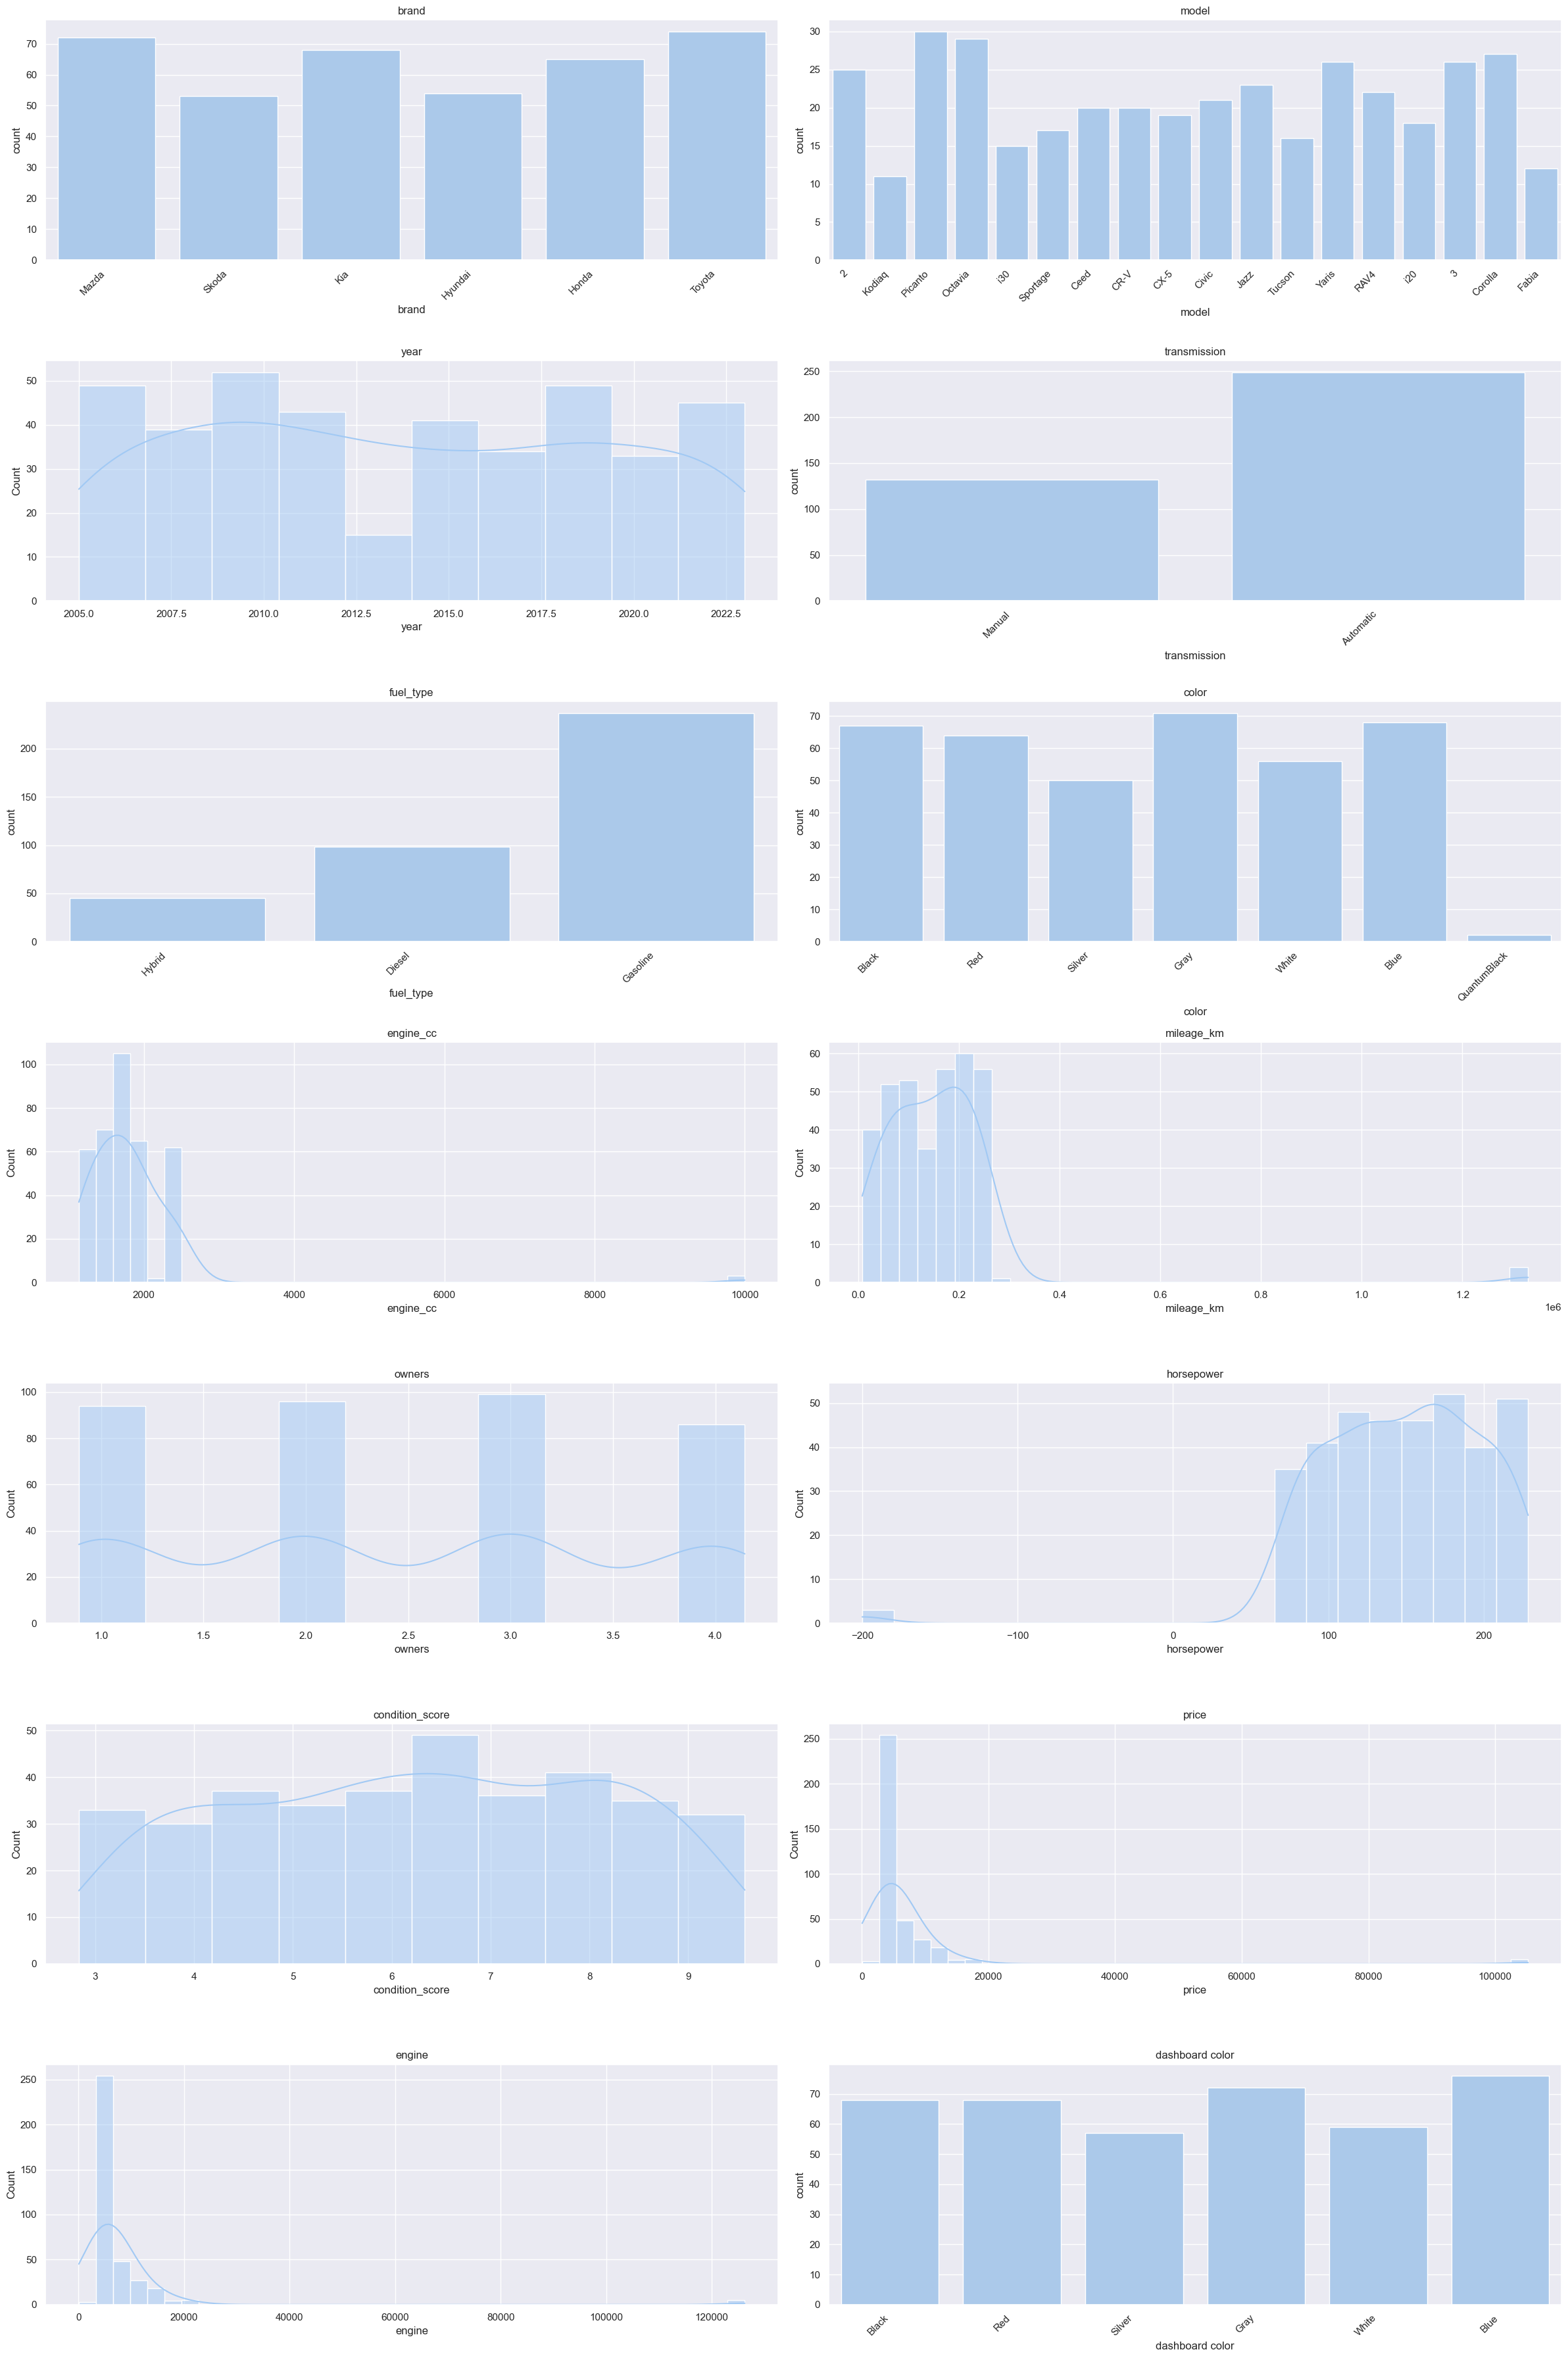

In [11]:
plt.figure(figsize=(24, 36))

# brand
plt.subplot(7, 2, 1)
sns.countplot(x=df['brand'])
plt.title('brand')
plt.xticks(rotation=45, ha="right")

# model
plt.subplot(7, 2, 2)
sns.countplot(x=df['model'])
plt.title('model')
plt.xticks(rotation=45, ha="right")

# year
plt.subplot(7, 2, 3)
sns.histplot(df['year'], kde=True)
plt.title('year')

# transmission
plt.subplot(7, 2, 4)
sns.countplot(x=df['transmission'])
plt.title('transmission')
plt.xticks(rotation=45, ha="right")

# fuel_type
plt.subplot(7, 2, 5)
sns.countplot(x=df['fuel_type'])
plt.title('fuel_type')
plt.xticks(rotation=45, ha="right")

# color
plt.subplot(7, 2, 6)
sns.countplot(x=df['color'])
plt.title('color')
plt.xticks(rotation=45, ha="right")

# engine_cc
plt.subplot(7, 2, 7)
sns.histplot(df['engine_cc'], kde=True)
plt.title('engine_cc')

# mileage_km
plt.subplot(7, 2, 8)
sns.histplot(df['mileage_km'], kde=True)
plt.title('mileage_km')

# owners
plt.subplot(7, 2, 9)
sns.histplot(df['owners'], kde=True)
plt.title('owners')

# horsepower
plt.subplot(7, 2, 10)
sns.histplot(df['horsepower'], kde=True)
plt.title('horsepower')

# condition_score
plt.subplot(7, 2, 11)
sns.histplot(df['condition_score'], kde=True)
plt.title('condition_score')

# price (TARGET)
plt.subplot(7, 2, 12)
sns.histplot(df['price'], kde=True)
plt.title('price')

# engine
plt.subplot(7, 2, 13)
sns.histplot(df['engine'], kde=True)
plt.title('engine')

# dashboard_color
plt.subplot(7, 2, 14)
sns.countplot(x=df['dashboard color'])
plt.title('dashboard color')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

<Axes: >

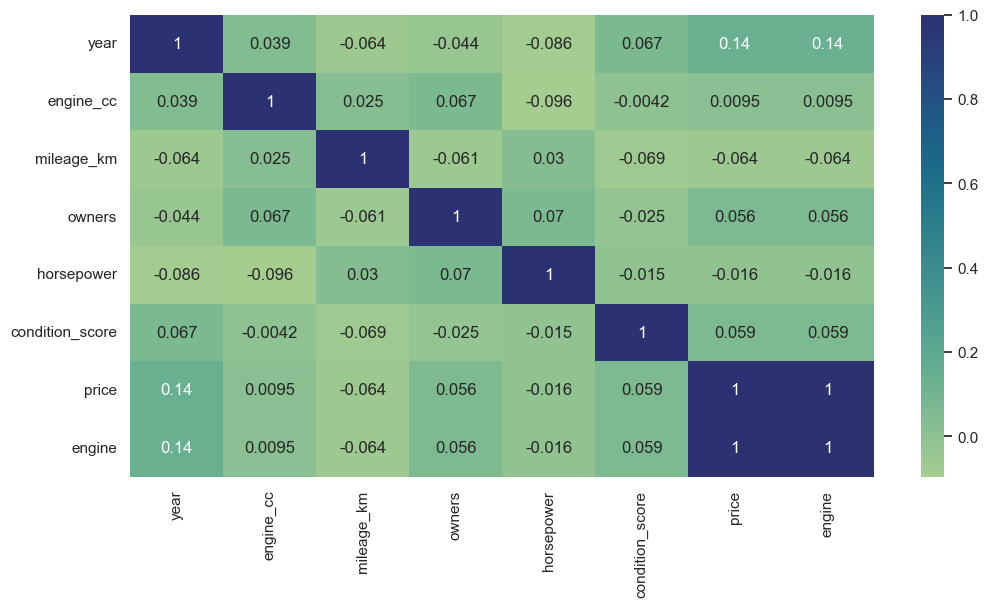

In [12]:
# visualizing relationships between all of the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="crest")

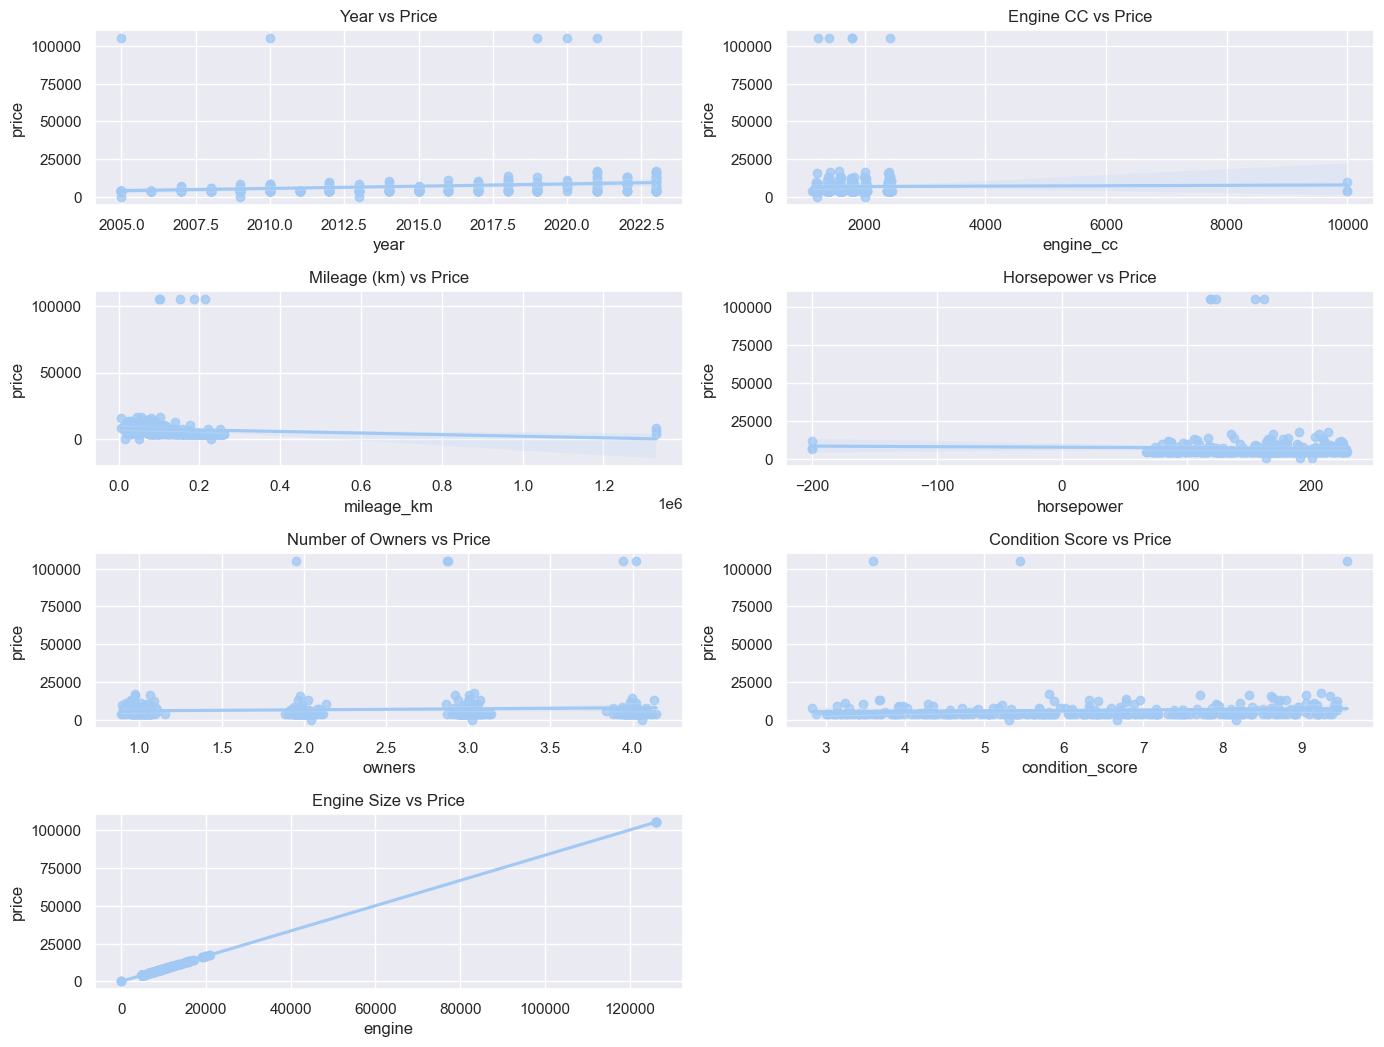

In [13]:
# visualizing relationships between numeric features and target variables 
plt.figure(figsize=(14, 18))

# year vs price
plt.subplot(7, 2, 1)
sns.regplot(data=df, x="year", y="price")
plt.title("Year vs Price")

# engine_cc vs price
plt.subplot(7, 2, 2)
sns.regplot(data=df, x="engine_cc", y="price")
plt.title("Engine CC vs Price")

# mileage_km vs price
plt.subplot(7, 2, 3)
sns.regplot(data=df, x="mileage_km", y="price")
plt.title("Mileage (km) vs Price")

# horsepower vs price
plt.subplot(7, 2, 4)
sns.regplot(data=df, x="horsepower", y="price")
plt.title("Horsepower vs Price")

# owners vs price
plt.subplot(7, 2, 5)
sns.regplot(data=df, x="owners", y="price")
plt.title("Number of Owners vs Price")

# condition_score vs price
plt.subplot(7, 2, 6)
sns.regplot(data=df, x="condition_score", y="price")
plt.title("Condition Score vs Price")

# engine vs price
plt.subplot(7, 2, 7)
sns.regplot(data=df, x="engine", y="price")
plt.title("Engine Size vs Price")

plt.tight_layout()
plt.show()

### NOTES:
#### price - 
* is skewed to the left with 233 priced at 4,000 $ which looks like a mistake
* there are several extreme outliers ranging above 100,000 $ priced cars
#### engine -
a corr coeaficient of 1 which seems like mistake <br>
from visual inspections we see that there are engines with more then 10,000 CC which has to be a mistake
#### horspower -
there are records with negative horsepower which is a mistake

In [49]:
# filtering for all of the cars with prices bigger then 4,000
df_high_priced = df[df["price"] > 4_000]

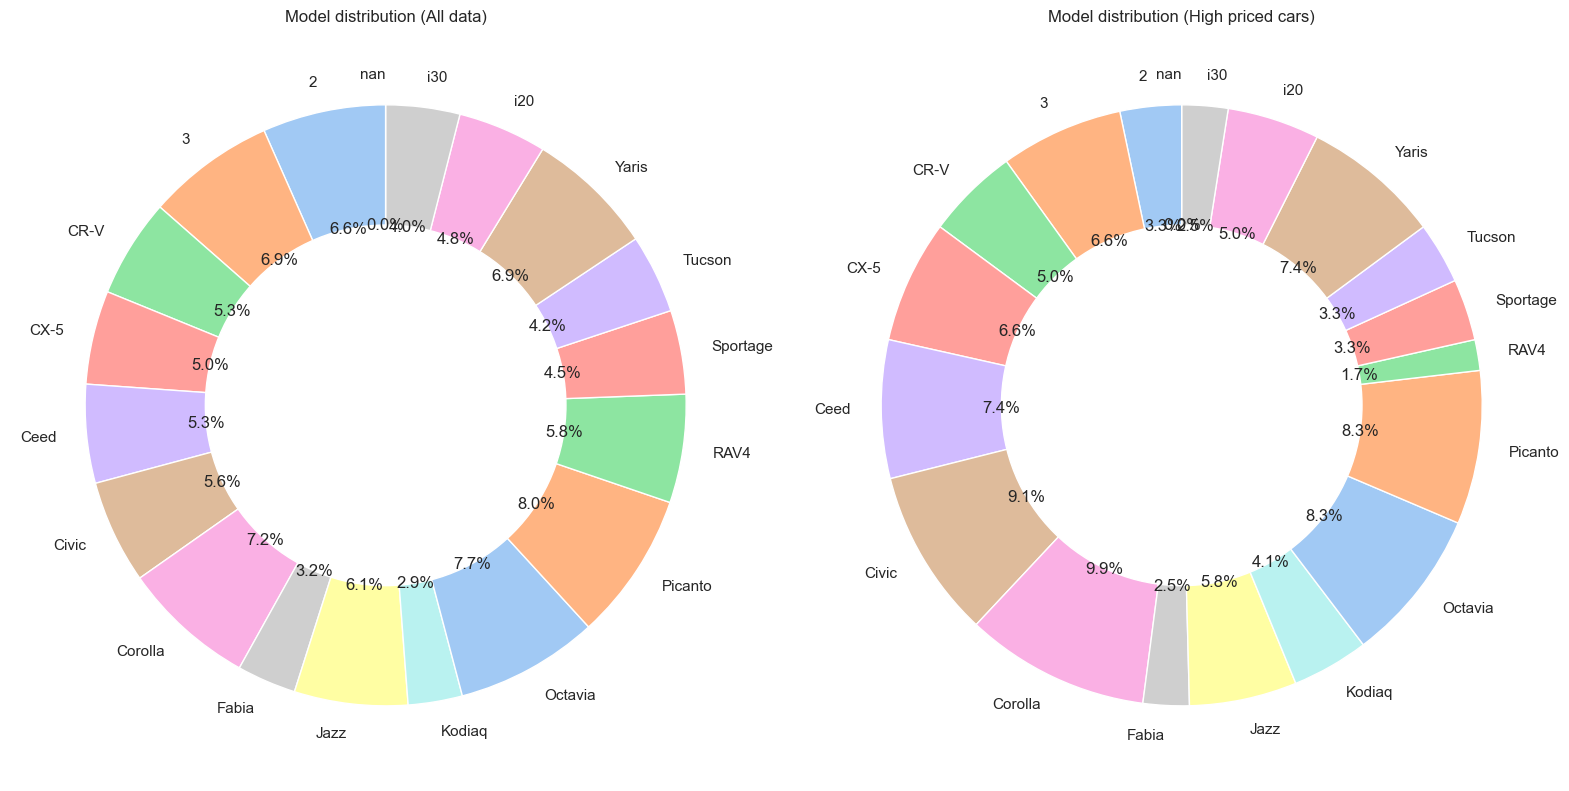

In [57]:
model_order = (df["model"].sort_values().unique())

counts_all = df["model"].value_counts().reindex(model_order, fill_value=0)
counts_high = df_high_priced["model"].value_counts().reindex(model_order, fill_value=0)


plt.figure(figsize=(16, 8))

# All data
plt.subplot(1, 2, 1)
plt.pie(
    counts_all,
    labels=counts_all.index,
    startangle=90,
    autopct='%1.1f%%'
)
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title("Model distribution (All data)")

# High priced data
plt.subplot(1, 2, 2)
plt.pie(
    counts_high,
    labels=counts_high.index,
    startangle=90,
    autopct='%1.1f%%'
)
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title("Model distribution (High priced cars)")

plt.tight_layout()
plt.show()

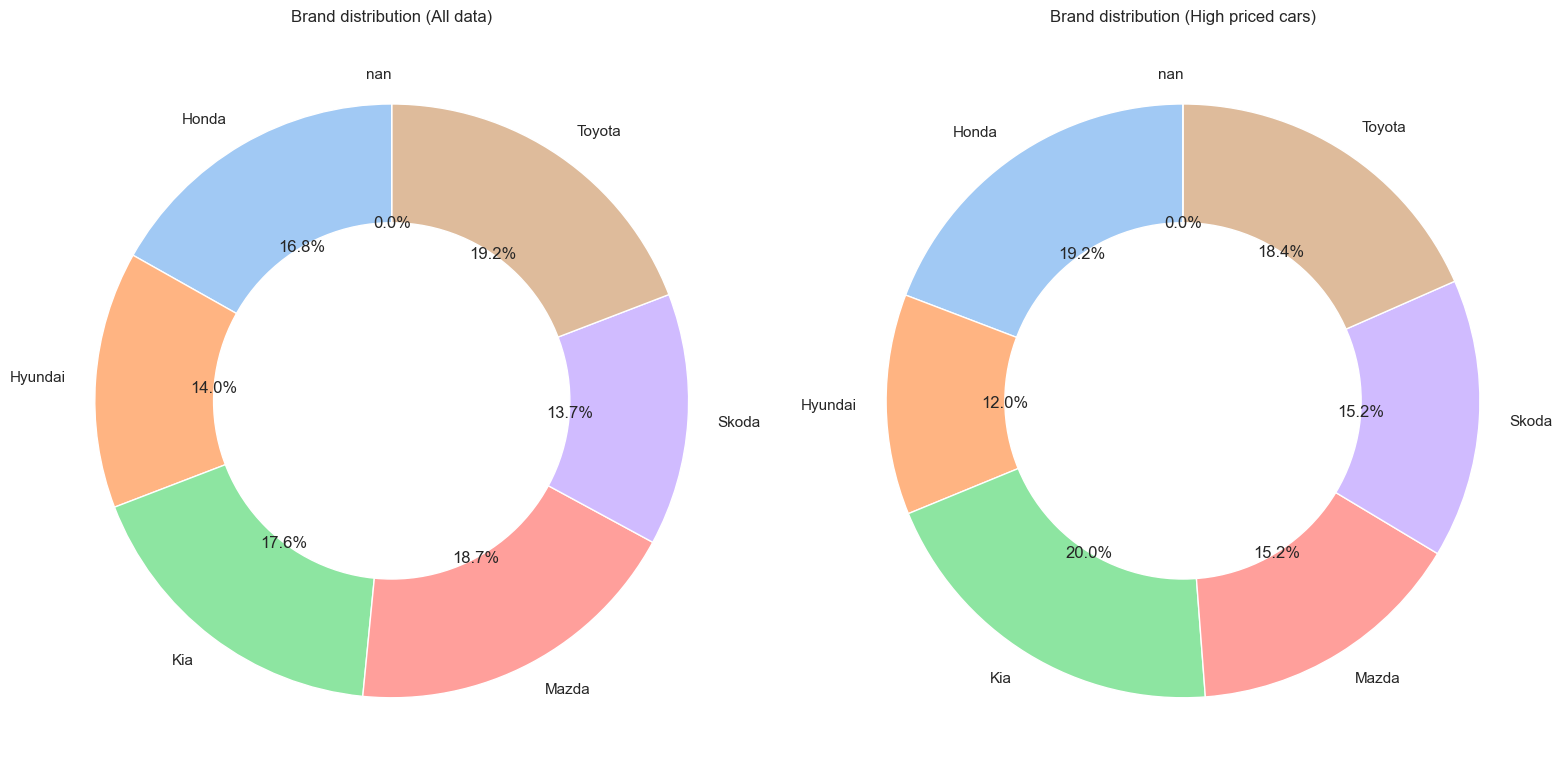

In [60]:
brand_order = (df["brand"].sort_values().unique())

counts_all = df["brand"].value_counts().reindex(brand_order, fill_value=0)
counts_high = df_high_priced["brand"].value_counts().reindex(brand_order, fill_value=0)


plt.figure(figsize=(16, 8))

# All data
plt.subplot(1, 2, 1)
plt.pie(
    counts_all,
    labels=counts_all.index,
    startangle=90,
    autopct='%1.1f%%'
)
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title("Brand distribution (All data)")

# High priced data
plt.subplot(1, 2, 2)
plt.pie(
    counts_high,
    labels=counts_high.index,
    startangle=90,
    autopct='%1.1f%%'
)
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title("Brand distribution (High priced cars)")

plt.tight_layout()
plt.show()

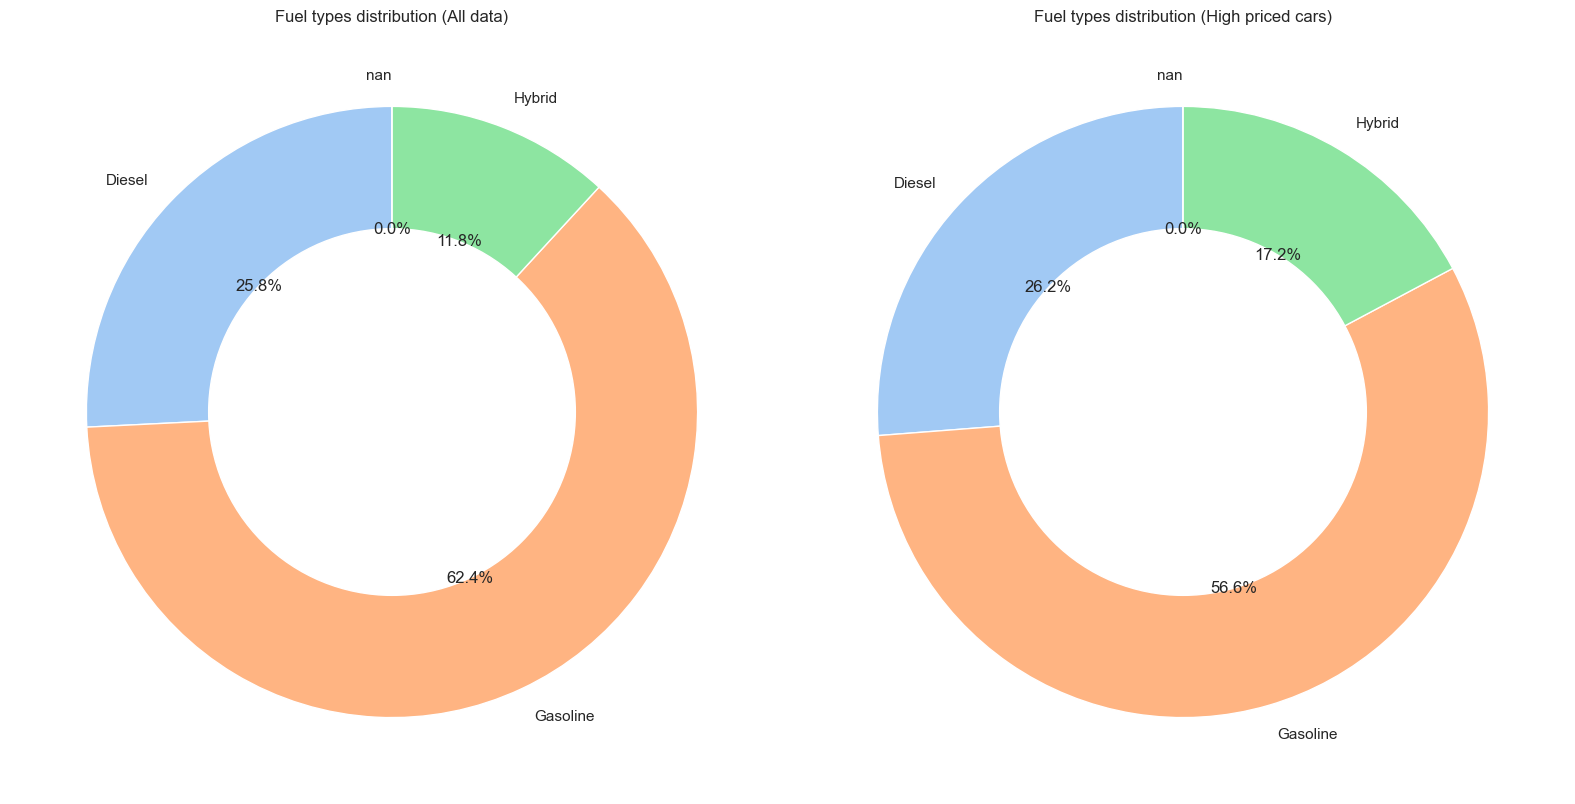

In [ ]:
fuel_type_order = (df["fuel_type"].sort_values().unique())

counts_all = df["fuel_type"].value_counts().reindex(fuel_type_order, fill_value=0)
counts_high = df_high_priced["fuel_type"].value_counts().reindex(fuel_type_order, fill_value=0)


plt.figure(figsize=(16, 8))

# All data
plt.subplot(1, 2, 1)
plt.pie(
    counts_all,
    labels=counts_all.index,
    startangle=90,
    autopct='%1.1f%%'
)
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title("Fuel types distribution (All data)")

# High priced data
plt.subplot(1, 2, 2)
plt.pie(
    counts_high,
    labels=counts_high.index,
    startangle=90,
    autopct='%1.1f%%'
)
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title("Fuel types distribution (High priced cars)")

plt.tight_layout()
plt.show()

### NOTES:
#### models - Rav4 share decreases compared to the highly priced cars dataset
#### Brands - Honda and Skoda shares are increasing in the highly priced cars dataset
#### Fuel types - Hybrid type share is higher in the highly priced cars dataset

## Feature Engineering

## Preprocessing

## Modeling

## Evaluation & Interpretation